# Trabajo en clase 04 - Javier Fernández
## Ecuación de Schrödinger

- Realice las actividades que se le indican en los espacios disponibles. 
- Debe entregar una copia de este cuaderno en el espacio habilitado el tecDigital para el trabajo en clase 04.
- **Valor total XX puntos**.
- Puede agregar celdas de texto o código si lo considera necesario.
- Use nombres descriptivos para las variables y las funciones que defina. 
- Agregue todos los comentarios que considere necesarios para mejorar la comprensión del código.

## Ecuación de Schrödinger

Se aplica el método de disparo para resolver numéricamente la ecuación de Schrödinger en una dimensión.

1. Defina los parámetros iniciales del sistema: espaciamiento de la grilla unidimensional, estimación inicial de la energía, incremento en la energía, parámetro de corte y una variable que almacene la dirección en la que diverge la $\psi$ (si diverge). Defina valores razonables. Estos valores se pueden modificar luego para mejorar el cómputo. **Valor: 2 puntos.**

In [1]:
# Importación de Librerías
import numpy as np
import matplotlib.pyplot as plt


In [27]:
# Parámetros del sistema

deltaX = 0.1
e_inicial = 0
deltaE = 0.01
pCorte = 2
direcDiv = 1


# Valores del Pozo
L = 1 #Mitad de largo del Pozo
x = np.arange(0,L+deltaX,deltaX)
N = np.size(x)



2. Defina los valores iniciales de $\psi$ para encontrar una solución _par_, esto es:  $\psi_{-1} = \psi_0 = 1$. Inicialice un arreglo que representa la función $\psi$. **Valor: 2 puntos.**

In [28]:
# Función de onda
psi = np.zeros(N)

psi[0] = 1
psi[1] = 1

print(psi)

[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3. Defina una función que establezca la forma del potencial $V$. Use el caso del pozo cuadrado infinito. **Valor: 2 puntos.**

In [9]:
# Potencial

def Potencial(x):
    return 0

4. Defina un ciclo que itere hasta que se encuentre el valor correcto de _E_. **Valor: 8 puntos.**
    - Para el valor actual de E, itere sobre las entradas del arreglo que representa $\psi$
        * Calcule $\psi_{i+1}$ usando:
       $$
        \psi_{i+1} = 2\psi_i - \psi_{i-1} - 2\Delta x^2 [E - V(x_i)]\psi_i
       $$
       * Evalue si $|\psi_{i+1}|$ > b
           + Si la expresión se cumple, la función diverge.
           + Si no se cumple, continue el ciclo.
    - Evalue el valor de `deltaE`. Si es pequeño se concluye que el valor de _E_ actual es aceptable, si no, se continua.
    - Si el último valor de $\psi$ tiene signo distinto a `direcDiv` se define $\Delta E = - \Delta E/2$.
    - Se actualiza el valor de prueba de $E$ a $E + \Delta E$.
    - El ciclo continua con el nuevo valor de $E$.

In [29]:
# Ciclo principal

run = 1
E = e_inicial


while run:
    for i in range(1,N-1):
        psi[i+1] = 2*psi[i] - psi[i-1] - 2* deltaX**2 * psi[i] * (E-Potencial(x[i]))
        
        if np.abs(psi[i+1]) > pCorte:
            run = 0
            print("E diverge")
            break
            
    if deltaE < 0.001:
        run = 0
        print("E converge con valor ", E)
        break
        
    if np.sign(direcDiv) != np.sign(psi[i+1]):
        deltaE = - deltaE/2
        
    E += deltaE 

        


E converge con valor  1.365000000000001


5. Grafique la función de onda obtenida.

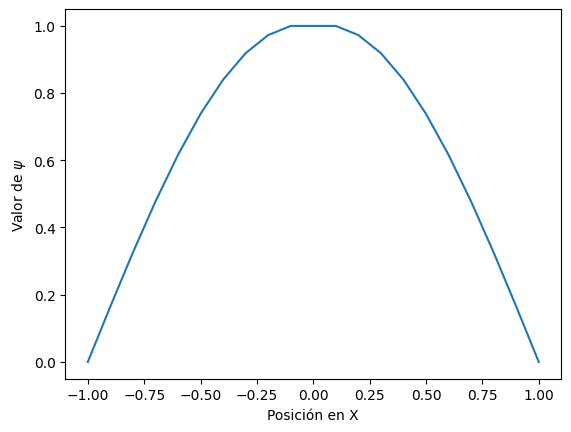

In [33]:

x_reversed = -1* x[::-1]
X = np.concatenate((x_reversed,x))

psi_reversed = psi[::-1]

PSI = np.concatenate((psi_reversed,psi))

plt.plot(X,PSI)
plt.xlabel("Posición en X")
plt.ylabel("Valor de $\psi$")
plt.show()

## Referencias

* Giordano, N.; Nakanishi, H. (2006). _Computational Physics, 2ª ed_. Estados Unidos: Pearson Education